In [1]:
# KNN_Classification.ipynb

# --- Cell 1: Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay


In [2]:
# --- Cell 2: Load Dataset ---
iris = load_iris()
X = iris.data
y = iris.target

print("Features:", iris.feature_names)
print("Target classes:", iris.target_names[:])
print("Shape of dataset:", X.shape)


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']
Shape of dataset: (150, 4)


In [3]:
# --- Cell 3: Normalize Features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]  # display first 5 rows of normalized data


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [4]:
# --- Cell 4: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


In [5]:
# --- Cell 5: Train KNN (k=5) ---
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with K={k}: {accuracy:.2f}")


Accuracy with K=5: 1.00


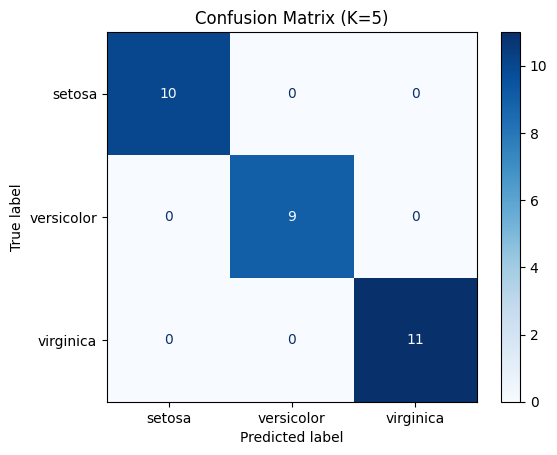

In [6]:
# --- Cell 6: Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title(f"Confusion Matrix (K={k})")
plt.show()


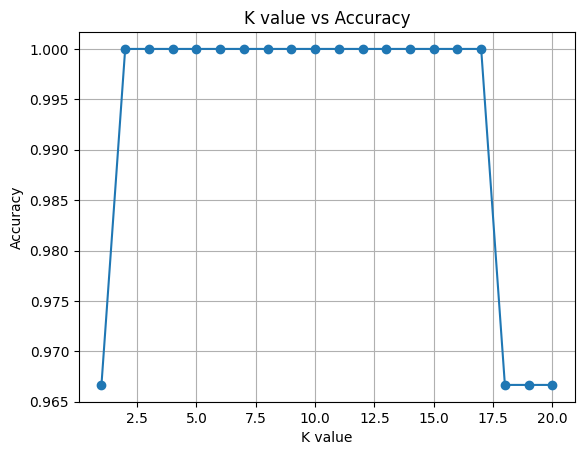

In [7]:
# --- Cell 7: Try Different K Values ---
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("K value vs Accuracy")
plt.grid()
plt.show()


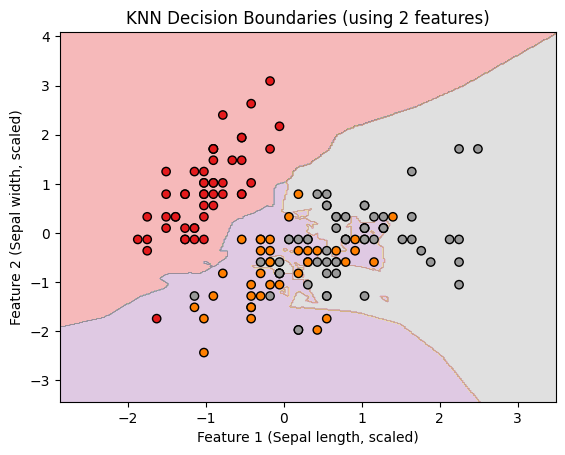

In [8]:
# --- Cell 8: Decision Boundary (using 2 features only) ---
# To visualize, we use only first 2 features
X_vis = X_scaled[:, :2]
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(
    X_vis, y, test_size=0.2, random_state=42
)

knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_vis, y_train_vis)

# Create mesh grid
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y, edgecolor='k', cmap=plt.cm.Set1)
plt.xlabel("Feature 1 (Sepal length, scaled)")
plt.ylabel("Feature 2 (Sepal width, scaled)")
plt.title("KNN Decision Boundaries (using 2 features)")
plt.show()
